Размер изображения: 525x700, каналов: 3
Сырой размер (uint8): 1102500 байт
k=1: размер ≈ 14712 байт
k=2: размер ≈ 29424 байт
k=10: размер ≈ 147120 байт
k=30: размер ≈ 441360 байт
k=100: размер ≈ 1471200 байт


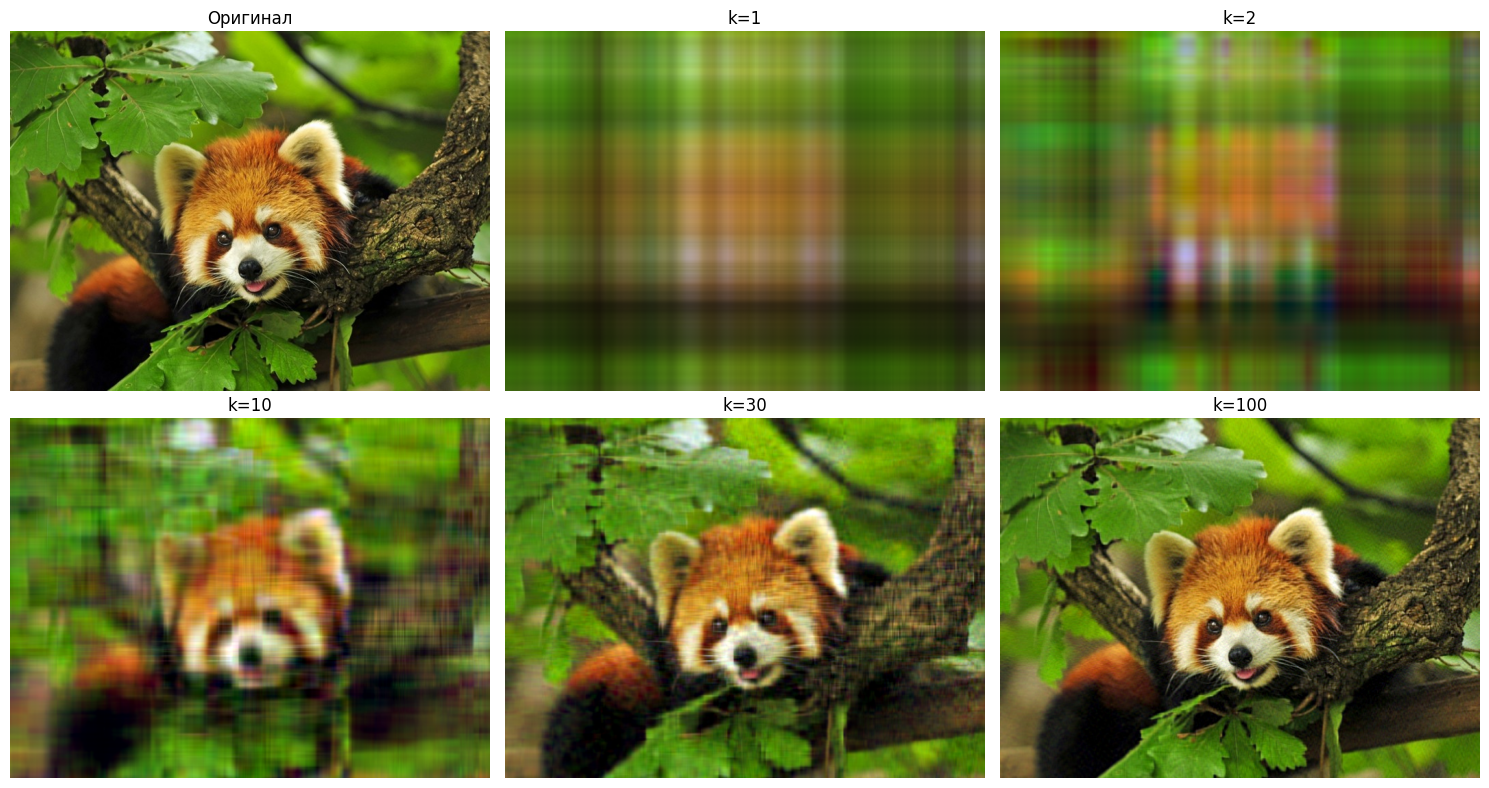

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

img = Image.open("panda.jpg").convert("RGB")
img_array = np.array(img, dtype=float)

m, n, c = img_array.shape
print(f"Размер изображения: {m}x{n}, каналов: {c}")

def compress_channel(channel, k):
    U, S, Vt = np.linalg.svd(channel, full_matrices=False)
    U_k = U[:, :k]
    S_k = S[:k]
    Vt_k = Vt[:k, :]
    recon = (U_k * S_k) @ Vt_k
    return np.clip(recon, 0, 255)

def compress_image(img_array, k):
    channels = [compress_channel(img_array[:, :, i], k) for i in range(3)]
    return np.stack(channels, axis=2).astype(np.uint8)

def svd_storage_size(m, n, k, c, dtype=np.float32):
    bytes_per_number = np.dtype(dtype).itemsize
    numbers = c * (m * k + k + k * n)
    return numbers * bytes_per_number


ks = [1, 2, 10, 30, 100]
plt.figure(figsize=(15, 8))

original_size = m * n * c
print(f"Сырой размер (uint8): {original_size} байт")

plt.subplot(2, len(ks)//2 + 1, 1)
plt.imshow(img_array.astype(np.uint8))
plt.title("Оригинал")
plt.axis("off")

for i, k in enumerate(ks, start=2):
    compressed = compress_image(img_array, k)
    plt.subplot(2, len(ks)//2 + 1, i)
    plt.imshow(compressed)
    plt.title(f"k={k}")
    plt.axis("off")

    size_svd = svd_storage_size(m, n, k, c)
    print(f"k={k}: размер ≈ {size_svd} байт")

plt.tight_layout()
plt.show()
